### Visualizing Data in Python
#### Tables, Histograms, Boxplots, and Slicing for Statistics

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using tables, histograms, box plots, and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

Today, we will be going over how to perform some basic visualisations in Python, and, most importantly, we will learn how to begin exploring data from a graphical perspective.

Answering the question, "What factors influence tip amounts? Smoker, party size, day of the week, etc."

In [4]:
# We first need to import the packages that we will be using
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

# Load in the Seaborn Tips data set (tip amount)
tips_data = sns.load_dataset("tips")

#### Visualizing the Data - Tables
When you begin working with a new data set,  it is often best to print out the first few rows before you begin other analysis. This will show you what kind of data is in the dataset, what data types you are working with, and will serve as a reference for the other plots that we are about to make. 

In [5]:
# Print out the first few rows of the data
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Describing Data
Summary statistics, which include things like the mean, min, and max of the data, can be useful to get a feel for how large some of the variables are and what variables may be the most important. 

In [3]:
# Print out the summary statistics for the QUANTITATIVE variables
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#### Creating a Histogram

After we have a general 'feel' for the data, it is often good to get a feel for the shape of the distribution of the data.

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


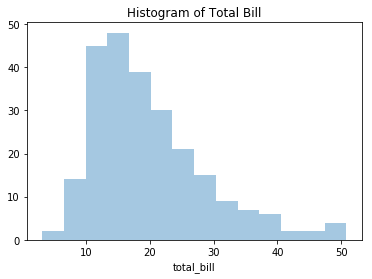

In [6]:
# Plot a histogram of the total bill
# kde = false bc don't want it to make kernel Density Estimate
sns.distplot(tips_data["total_bill"], kde = False).set_title("Histogram of Total Bill")
plt.show()

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


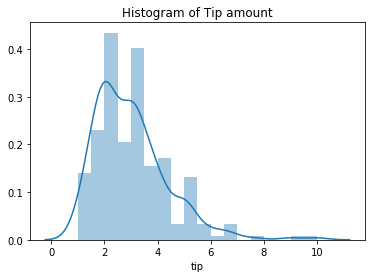

In [8]:
# Plot a histogram of the Tips only
sns.distplot(tips_data["tip"], kde=True).set_title("Histogram of Tip amount")
plt.show()

# the kde can be distracting so he usually doesn't include it.

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


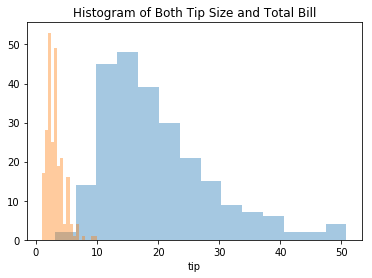

In [9]:
# Plot a histogram of both the total bill and the tips on the SAME axis!
sns.distplot(tips_data["total_bill"], kde = False)
sns.distplot(tips_data["tip"], kde = False).set_title("Histogram of Both Tip Size and Total Bill")
plt.show()

#### Creating a Boxplot

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

#### The Total Bill and Tip box plots look the SAME even though their distributions are different (tip is bimodal)

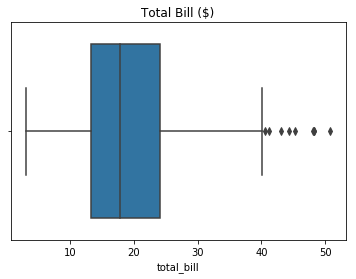

In [11]:
# Create a boxplot of the total bill amounts
sns.boxplot(tips_data["total_bill"]).set_title("Total Bill ($)")
plt.show()

#Has some outliers between $45 and $55. Median is ~$18, corresponds with 50% in describe table above

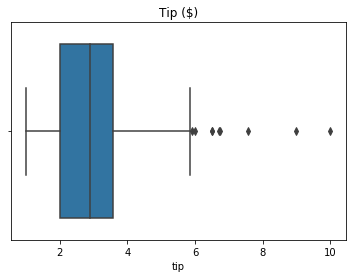

In [12]:
# Create a boxplot of the tips amounts
sns.boxplot(tips_data["tip"]).set_title("Tip ($)")
plt.show()


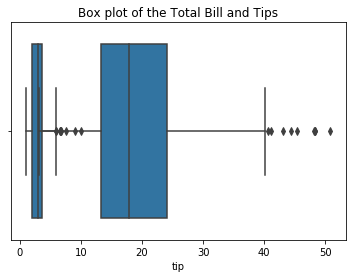

In [13]:
# Create a boxplot of the tips and total bill amounts - do not do it like this!
sns.boxplot(tips_data["total_bill"])
sns.boxplot(tips_data["tip"]).set_title("Box plot of the Total Bill and Tips")
plt.show()

#### Creating Histograms and Boxplots Plotted by Groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Using graphs, we can see if there is a difference between the tipping amounts of smokers vs. non-smokers, if tipping varies according to the time of the day, or we can explore other trends in the data as well.

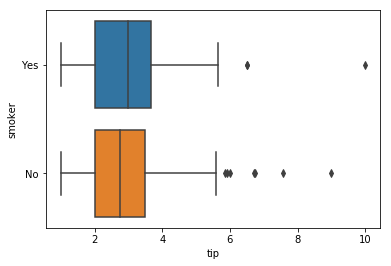

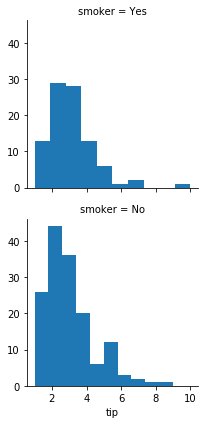

In [15]:
## Create a boxplot and histogram of the tips grouped by smoking status
# x = frequency data that I want to plot
# y = what I am grouping by
sns.boxplot(x = tips_data["tip"], y = tips_data["smoker"])

# Make separate histograms (facet grid) for SMOKERS and NON-Smokers.
# map() allows us to use the histogram feature of plotting for different groups wWITHOUT putting them on the same axis.
g = sns.FacetGrid(tips_data, row= "smoker")
g = g.map(plt.hist, "tip")

plt.show()



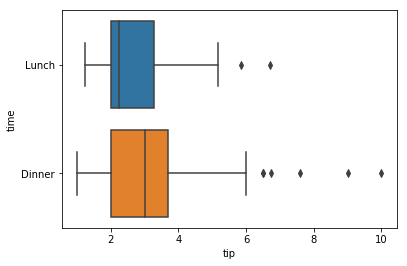

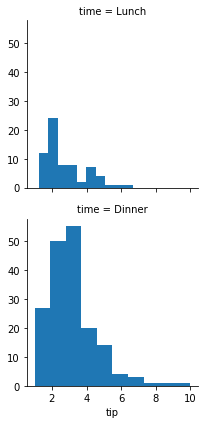

In [17]:
# Create a boxplot and histogram of the tips grouped by time of day
sns.boxplot(x=tips_data["tip"], y = tips_data["time"])

g = sns.FacetGrid(tips_data, row="time")
g.map(plt.hist, "tip")
plt.show()

## Histogram shows way more observations for Dinner bc the bars are higher. Indicates that people are eating at this restaurant
## more during dinner and typically leaving bigger tips.

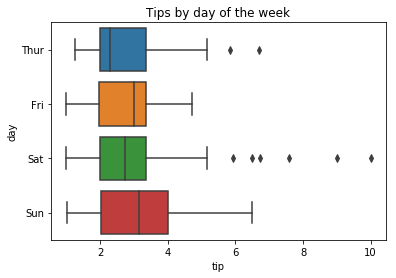

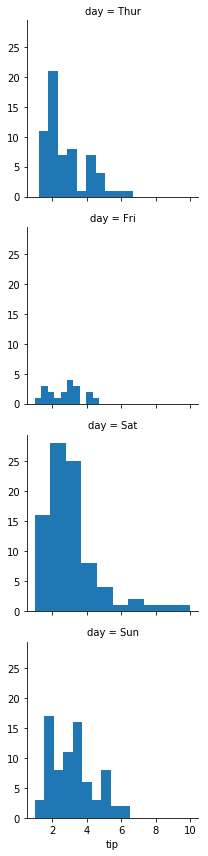

In [24]:
# Create a boxplot and histogram of the tips grouped by the day
sns.boxplot(x=tips_data["tip"],y=tips_data["day"]).set_title("Tips by day of the week")

g = sns.FacetGrid(tips_data, row="day")
g.map(plt.hist, "tip")
plt.show()

## What is the best day for earning tips?
# Saturday has the most bills and the highest tips

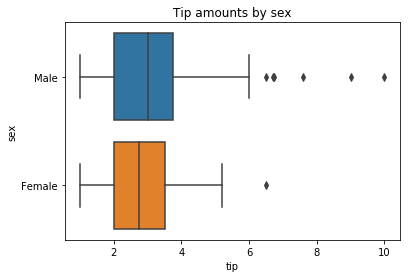

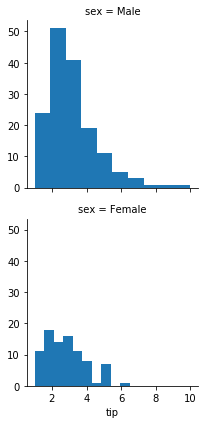

In [28]:
#Look at tip amounts by SEX (male vs. female)
sns.boxplot(x=tips_data["tip"], y=tips_data["sex"]).set_title("Tip amounts by sex")

g = sns.FacetGrid(tips_data, row="sex")
g.map(plt.hist, "tip")
plt.show()

Text(0.5,1,'Tip amounts by Party Size')

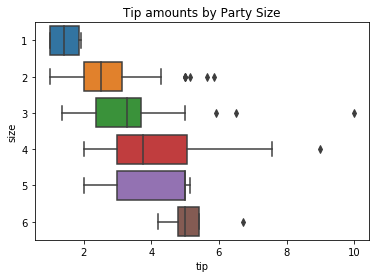

In [32]:
#Look at tip amounts by PARTY size
sns.boxplot(x=tips_data["tip"], y=tips_data["size"].astype("category")).set_title("Tip amounts by Party Size")


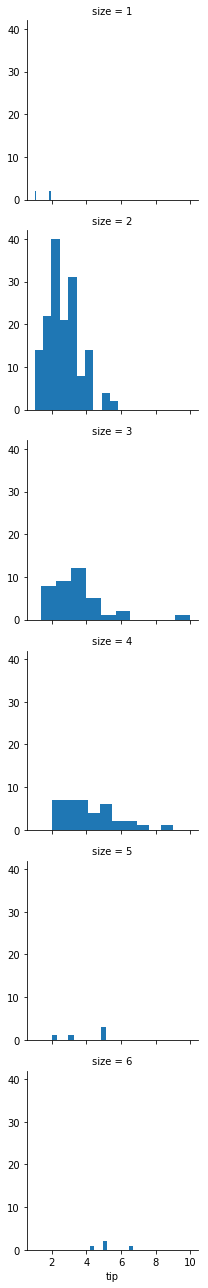

In [30]:
g = sns.FacetGrid(tips_data, row="size")
g.map(plt.hist, "tip")
plt.show()